# Linear Regression  

In [1]:
# Import packages
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [2]:
# General plot parameters
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.linewidth'] = 2

mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.labelpad'] = 10

mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 2

## Generate some noisy data with `numpy.random`

In [3]:
# Generate some data with noise
w0_samp = 4
w1_samp = 3
x = np.linspace(-2, 4, 100)
np.random.seed(10242)
y = w0_samp + w1_samp*x + 3*np.random.normal(size=x.size)

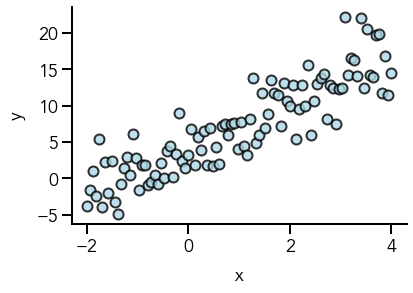

In [4]:
# Create figure
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)

# Plot data
ax.scatter(x, y, s=100, facecolor='#add8e6', edgecolor='black', linewidth=2, alpha=0.8)

# Set axis labels
ax.set(xlabel='x', ylabel='y')

plt.show()

## Define cost function using mean squared error  
  
&nbsp;  
### In two-dimensions:
### $J(w_0, w_1) = \dfrac{1}{2m}\sum\limits_{i = 1}^{m}\left(\underbrace{w_0 x_0 + w_1 x_1^i}_{\textrm{Prediction}} - \underbrace{y^i}_{\textrm{Actual}}\right)^2$  
where $x_0 = 1$ and we are summing over the $i$ training examples
  
&nbsp;  
&nbsp;  
### More generally (in $n$-dimensions):
### $J(w_0 \ldots w_n) = \dfrac{1}{2m}\sum\limits_{i = 1}^{m}\left(h_w(x^i) - y^i\right)^2$  
where we define a <b>hypothesis function</b>  
### $h_w(x^i) = \sum\limits_{j = 0}^n w_j x_j^i$

In [5]:
def cost_function(X, y, w):
    """
    Computes the cost function of the linear regression
    
    Parameters
        X (np.array): matrix of x values (m x (n+1))
        y (np.array): matrix of y values (m x 1)
        w (np.array): matrix of weight values ((n+1) x 1)
    
    Returns
        (float): cost value
    """
    
    m = len(y)
    return (1/(2*m))*sum((np.dot(X, w) - y)**2)[0]

## Initialize variables for gradient descent  
We have $m$ training examples with $n + 1$ features ($n$ dimensions)
### $X = \begin{bmatrix} x_0^1 & \cdots & x_n^1 \\ \vdots & \ddots & \vdots \\ x_0^m & \cdots & x_n^m \end{bmatrix} m \times (n + 1) \textrm{ matrix}$  
($x_j^i$ is the $j^{th}$ feature of the $i^{th}$ training example)
### $y = \begin{bmatrix} y_0 \\ \vdots \\ y_m \end{bmatrix} m \times 1 \textrm{ vector}$
### $w = \begin{bmatrix} w_0 \\ \vdots \\ w_m \end{bmatrix} (n + 1) \times 1 \textrm{ vector}$

In [6]:
# Initialize variables
X = np.concatenate((np.ones(shape=(len(x), 1)), x.reshape(len(x), 1)), axis=1)
y = y.reshape(len(x), 1)
w = np.zeros(shape=(2, 1))

## Calculate initial value of the cost function

In [7]:
initial_cost = cost_function(X, y, w)
print('Cost with initialized values: %.2f' % initial_cost)

Cost with initialized values: 45.40


## Define function to implement gradient descent  
&nbsp;  

Generalized update function ($\alpha$ is the learning rate)  
&nbsp;  

### $w_i = w_i - \alpha\dfrac{\partial J(w_0 \ldots w_n)}{\partial w_j}$  
&nbsp;  

We can calculate the value of the gradient from the cost function:  
&nbsp;  

### $\dfrac{\partial J(w_0 \ldots w_n)}{\partial w_j} = \dfrac{1}{m} \sum\limits_{i = 1}^{m}\left(h_w(x^i) - y^i\right) \cdot x_j^i$

In [8]:
def gradient_descent(X, y, w, alpha, num_iters):
    """
    Uses gradient descent to minimize the cost function
    
    Parameters
        X (np.array): matrix of x values (m x (n+1))
        y (np.array): matrix of y values (m x 1)
        w (np.array): matrix of weight values ((n+1) x 1)
        alpha (float): learning rate
        num_iters (int): number of iterations
    
    Returns
        J (np.array): cost function at each iteration
        w_new (np.array): optimized weights
        w_hist (np.array): weights at each timestep
    """
    
    w_new = np.copy(w)
    w_hist = np.copy(w)
    m = len(y)
    J = np.zeros(num_iters)
    
    for i in range(num_iters):
        w_new = w_new - (alpha/m)*(np.dot((np.dot(X, w_new) - y).T, X)).T
        w_hist = np.concatenate((w_hist, w_new), axis=1)
        J[i] = cost_function(X, y, w_new)
    return J, w_new, w_hist

## Use gradient descent to calculate $w$ that minimizes cost

In [9]:
J, w_train, w_hist = gradient_descent(X, y, w, 0.1, 100)

In [10]:
print('Calculated values of w:\n' +
      'w_0 = %.2f' % w_train[0] +
      '\nw_1 = %.2f' % w_train[1])

Calculated values of w:
w_0 = 4.01
w_1 = 3.16


## Plot fit superimposed on data

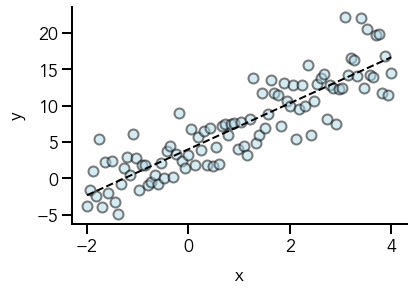

In [11]:
# Create figure
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)

# Plot data
ax.scatter(x, y, s=100, facecolor='#add8e6', edgecolor='black', linewidth=2, alpha=0.5)

# Plot regression line
ax.plot(x, w_train[1]*x + w_train[0], color='black', linestyle='--', linewidth=2)

# Set axis labels
ax.set(xlabel='x', ylabel='y')

plt.show()

## Calculate costs contours and plot path of gradient descent

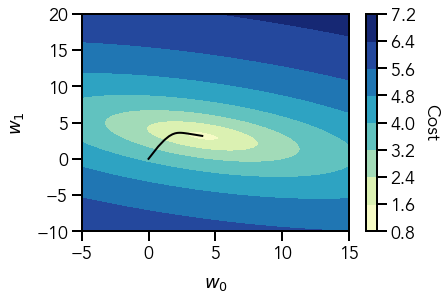

In [12]:
# Create figure
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)

# Add top and right spines
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)

# Create grid of cost values for varying w_0 and w_1
w_0, w_1 = np.meshgrid(np.linspace(-5, 15, 100), np.linspace(-10, 20, 100))
cost = np.zeros(shape=(len(w_0), len(w_1)))
for i in range(len(w_0)):
    for j in range(len(w_1)):
        cost[i][j] = cost_function(X, y, np.array([[w_0[i][j]], [w_1[i][j]]]))

# Plot cost function contours and add colorbar       
contour_plot = ax.contourf(w_0, w_1, np.log(cost), cmap='YlGnBu')
cbar = plt.colorbar(mappable=contour_plot)
cbar.set_label('Cost', rotation=270, labelpad=25)

# Plot gradient descent path
ax.plot(w_hist[0], w_hist[1], color='black', linewidth=2)

# Set axes labels
ax.set(xlabel=r'$w_0$', ylabel=r'$w_1$')

plt.show()

## Plot gradient and associated vector field

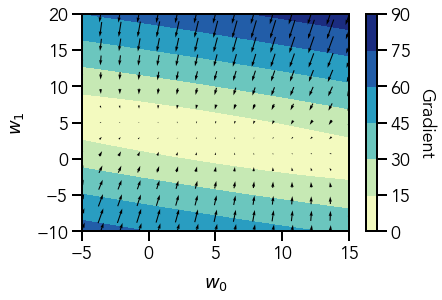

In [13]:
# Create figure
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)

# Add top and right spines
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)

# Calculate grid of gradient components
w_0, w_1 = np.meshgrid(np.linspace(-5, 15, 15), np.linspace(-10, 20, 15))
gradient_x = np.zeros(shape=(len(w_0), len(w_1)))
gradient_y = np.zeros(shape=(len(w_0), len(w_1)))
for i in range(len(w_0)):
    for j in range(len(w_1)):
        w_curr = np.array([[w_0[i][j]], [w_1[i][j]]])
        gradient = (-1/len(y))*(np.dot((np.dot(X, w_curr) - y).T, X)).T
        gradient_x[i][j] = gradient[0]
        gradient_y[i][j] = gradient[1]

# Calculate magnitude of the gradient
mag = np.sqrt(np.power(gradient_x, 2) + np.power(gradient_y, 2))

# Plot contours of gradient magnitude
contour_plot = ax.contourf(w_0, w_1, mag, cmap='YlGnBu')
cbar = plt.colorbar(mappable=contour_plot)
cbar.set_label('Gradient', rotation=270, labelpad=25)

# Add quiver plot of gradient vectors
quiver_plot = ax.quiver(w_0, w_1, gradient_x, gradient_y, color='black', pivot='mid')

# Add axis labels
ax.set(xlabel=r'$w_0$', ylabel=r'$w_1$')

plt.show()

# Linear regression in three-dimensions  
&nbsp;  

## Generate noisy sample data

In [14]:
# Generate dataset
w2_samp = 5
w1_samp = 2
w0_samp = 8

np.random.seed(10504)
x_1 = np.linspace(-5, 5, 100) + 2*np.random.random(size=100)
x_2 = np.linspace(-3, 8, 100) + 2*np.random.random(size=100)
y = w2_samp*x_2 + w1_samp*x_1 + w0_samp

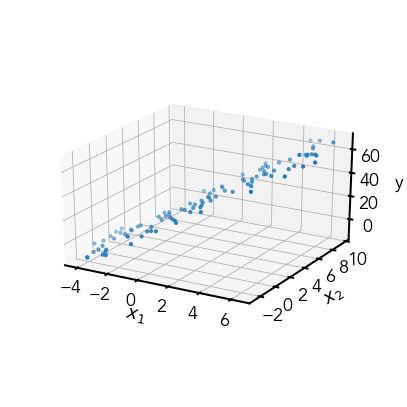

In [15]:
# Create figure
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot data
ax.scatter(x_1, x_2, y, s=10)

# Set axis labels
ax.set(xlabel=r'$x_1$', ylabel=r'$x_2$', zlabel=r'y')

# Adjust plot viewport
ax.view_init(elev=25)
ax.dist = 12

plt.tight_layout()
plt.show()

## Initialize variables for gradient descent

In [16]:
X = np.concatenate((np.ones(shape=(len(x_1), 1)), x_1.reshape(len(x_1), 1), x_2.reshape(len(x_2), 1)), axis=1)
y = y.reshape(len(x_1), 1)
w = np.zeros(shape=(3, 1))

## Calculate initial value of cost function

In [17]:
initial_cost = cost_function(X, y, w)
print('Cost with initialized values: %.2f' % initial_cost)

Cost with initialized values: 627.09


## Train model and plot cost value after iteration

In [18]:
J, w_train, w_hist = gradient_descent(X, y, w, 0.01, 100)
print('Calculated values:\n' + 'w_0 = %.2f' % w_train[0] + '\nw_1 = %.2f' % w_train[1] + '\nw_2 = %.2f' % w_train[2])

Calculated values:
w_0 = 3.03
w_1 = 0.35
w_2 = 6.68


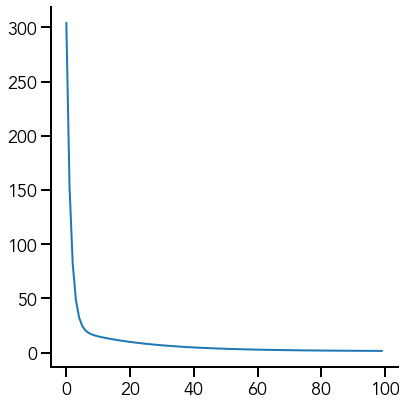

In [19]:
# Create figure
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

# Plot cost over time
ax.plot(range(len(J)), J, linewidth=2)

plt.tight_layout()
plt.show()

## Plot data with superimposed regression line

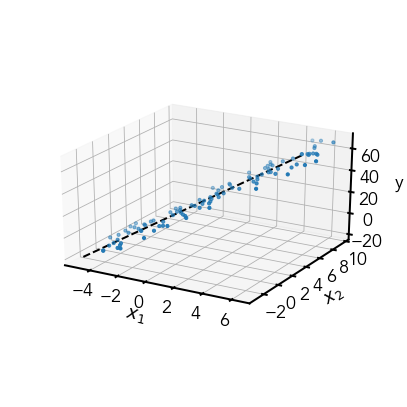

In [20]:
# Create figure
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot data
ax.scatter(x_1, x_2, y, s=10)

# Plot regression line
x1_reg = np.linspace(-5, 5, 100)
x2_reg = np.linspace(-3, 8, 100)
ax.plot(x1_reg, x2_reg, w_train[0] + w_train[1]*x1_reg + w_train[2]*x2_reg, linewidth=2, linestyle='--', color='black')

# Set axis labels
ax.set(xlabel=r'$x_1$', ylabel=r'$x_2$', zlabel=r'y')

# Adjust plot viewport
ax.view_init(elev=25)
ax.dist = 12

plt.tight_layout()
plt.show()